# KNN em Python
```
José de Senna Pereira Neto - 201704940010
Sandy Andrade Faro - 201604940027
```

## Código Principal:

In [10]:
import random
from collections import Counter
from csv import reader
from math import sqrt

inf=10**-20

def moda(s):
    #print(s)
    lf=Counter(s).items()
    x=sorted(lf,key=lambda x: x[1])
    return x[-1][0]

### medidas de distancia e similaridade em vetores
def euclD(x,y):return round(sqrt(sum(pow(a-b,2) for a, b in zip(x, y))),3)
def manhD(x,y):return round(sum(abs(a-b) for a,b in zip(x,y)),3)
def rootX2(x ):return round(sqrt(sum([a*a for a in x])),3)  
def cosiV(x,y):return round(sum(a*b for a,b in zip(x,y))/(inf+float(rootX2(x)*rootX2(y))),3)

def isFloat(x):
    try:
        float(x)
        return True
    except ValueError:
        return False
    
def mapFloat(linha): #mapeia para float os valores 
    lin2=[]
    for i in range(len(linha)):
        if isFloat(linha[i]):
            lin2 += [float(linha[i])]
        else: lin2 += [linha[i]]
    return lin2

maxVet=0 # max col Vetor  

def col(i,dat):return [dat[j][i] for j in range(0,len(dat))] 
def med(c): return sum(c)/len(c)
def suml(l): return sum(l[0:maxVet])
 
# Load a CSV file
def load_csv(filename):
	dataset = []
	with open(filename, 'r') as file:
		linhas = reader(file)  #leitor do pacote CSV 
		for row in linhas:
			if not row: continue    
			dataset.append(mapFloat(row))
	return dataset

#arq = int(input("\n1 - diabetes.csv\n2 - iris.csv\n3 - glass.csv\nEscolha o arquivo a ser carregado: "));


viz = 1

while (viz <= 2):
    if (viz == 1):
        vizinhos = 1
    else:
        vizinhos = 3

    see = 1

    while (see <= 2):
        if (see == 1):
            semente = 201604940027
        else:
            semente = 201704940010
    
        arq = 1
        print("SEMENTE:", semente, "K =", vizinhos, "\n")
    
        while (arq <= 3):
            if (arq == 1):
                filename = 'diabetes.csv'
            elif (arq == 2):
                filename = 'iris.csv'
            else:
                filename = 'glass.csv'
    
            #Load dataset
            #filename = 'diabetes.csv'
            dataset = load_csv(filename)
            maxVet=len(dataset[1])-1
            #print('\n'*3)
            print('ARQUIVO   :',filename)
            print('CARREGOU  :',len(dataset), 'linhas cada com', len(dataset[0]), 'colunas')
            print('CABEÇALHO :',dataset[0])
            #print('ex linhas :',dataset[1:5])

            random.seed(semente)
            #print(dataset[:10])
            del dataset[0]
            random.shuffle(dataset)
            dataset=dataset[:100]

            percent=0.66
            meio=int(percent*len(dataset))
            TREINO=dataset[    :meio]
            TESTE =dataset[meio:    ]
            # TREINO, TESTE = TESTE, TREINO
            print('TAMANHO DA AMOSTRA:', len(dataset))
            print('TREINO:', len(TREINO), 'TESTE:', len(TESTE))

            ########KNN###########
            def knn(k,j):  
                RANGE=range(len(TREINO))   
                LIN=[]; teste_j=TESTE[j][:maxVet]
                for i in RANGE:
                    LIN.append( (i, euclD(teste_j,TREINO[i][:maxVet]) )) #cosiV(...) ))
                LIN.sort(key=lambda x: x[1])                             #reverse=True)  
                idx,_=zip(* LIN[0:k]) 
                return moda([TREINO[i][-1] for i in idx])
    
            CHUTE=[]; k=1
            for i in range(len(TESTE)):CHUTE.append(knn(k,i))
            ESPER=col(-1,TESTE)
            #print("CHUTE: ", CHUTE[:10])
            #print("ESPERADO: ", ESPER[:10])
            #exit(1)
            ESPxCHUT=zip(CHUTE,ESPER)
            acertos=[1 for (c,e) in ESPxCHUT if c==e]
    
            ## CÁLCULO DE GRANDEZAS ##
    
            from sklearn.preprocessing import LabelEncoder
            from sklearn.metrics import confusion_matrix
    
            textoCodificado = LabelEncoder()
            CHUTE_codificado = textoCodificado.fit_transform(CHUTE)
            ESPER_codificado = textoCodificado.fit_transform(ESPER)
    
            def numeroAcertos(acertos):
                return sum(acertos)
    
            def acuracia(acertos,lista):
                return numeroAcertos(acertos)/len(lista)
    
            def meanAbsoluteError(previsao, resultado):
                return sum(map(lambda t:abs(float(t[0]-t[1])),zip(previsao, resultado)))/len(previsao)
    
            def rootMeanSquaredError(previsao, resultado):
                return (sum(map(lambda t:float(t[0]-t[1])**2,zip(previsao, resultado)))/len(previsao))**0.5
    
            def precision(positivosVerdadeiros, falsosPositivos):
                return positivosVerdadeiros/(positivosVerdadeiros+falsosPositivos)
    
            def recall(positivosVerdadeiros, falsosNegativos):
                return positivosVerdadeiros/(positivosVerdadeiros+falsosNegativos)
    
            def f_measure(precisao, revocacao):
                return 2*(precisao*revocacao)/(precisao+revocacao)
    
            p_verdadeiros = numeroAcertos(acertos)
            f_positivos = len(ESPER_codificado) - p_verdadeiros
            f_negativos = len(ESPER_codificado) - f_positivos
    
            print("ACERTOS: ", numeroAcertos(acertos)) 
            #print('sum acertos', sum(acertos))
            print('ACURACIA:', acuracia(acertos,TESTE))
            print("MEAN ABSOLUTE ERROR: ", meanAbsoluteError(CHUTE_codificado,ESPER_codificado))
            print("ROOT MEAN SQUARED ERROR: ", rootMeanSquaredError(CHUTE_codificado,ESPER_codificado))
            print("PRECISION: ", precision(p_verdadeiros, f_positivos))
            print("RECALL: ", recall(p_verdadeiros, f_negativos))
            print("F-MEASURE: ", f_measure(precision(p_verdadeiros, f_positivos),recall(p_verdadeiros, f_negativos)))
            print("MATRIZ DE CONFUSÃO:")
            print(confusion_matrix(ESPER,CHUTE))
            print("\n")    
        
            arq = arq + 1
    
        see = see + 1
    
    viz = viz + 1

SEMENTE: 201604940027 K = 1 

ARQUIVO   : diabetes.csv
CARREGOU  : 769 linhas cada com 9 colunas
CABEÇALHO : ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  25
ACURACIA: 0.7352941176470589
MEAN ABSOLUTE ERROR:  0.2647058823529412
ROOT MEAN SQUARED ERROR:  0.5144957554275266
PRECISION:  0.7352941176470589
RECALL:  0.5
F-MEASURE:  0.5952380952380952
MATRIZ DE CONFUSÃO:
[[21  4]
 [ 5  4]]


ARQUIVO   : iris.csv
CARREGOU  : 151 linhas cada com 5 colunas
CABEÇALHO : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  32
ACURACIA: 0.9411764705882353
MEAN ABSOLUTE ERROR:  0.058823529411764705
ROOT MEAN SQUARED ERROR:  0.24253562503633297
PRECISION:  0.9411764705882353
RECALL:  0.5
F-MEASURE:  0.6530612244897959
MATRIZ DE CONFUSÃO:
[[12  0  0]
 [ 0 13  1]
 [ 0  1  7]]


ARQUIVO   : glass.csv
CARREGOU  : 215 linhas cada com 10 colunas
CABEÇ

## Questões:

### 49. Explique qual é o significado da variavel "percent" e "meio"?

Percent é a porcentagem de linhas retirada para o teste. 
Meio é responsável por separar a porcentagem de treino e a de teste.

### 50. Qual são os papeis das listas TREINO e TESTE?

Treino é utilizado para coletar os padrões dos vizinhos mais próximos. Teste utiliza essas informações e faz um teste com as linhas restantes.

### 51. O que faz a linha: random.seed(13)?

Atribui uma semente para o gerador de arquivos aleatório e assim mantém sempre a mesma forma de embaralhamento garantindo o mesmo resultado.

### 52. O que faz a linha "del dataset[0]", porque é necessária?

A linha del dataset[0] deleta o cabeçalho, para que o mesmo não seja embaralhado junto às outras linhas e assim atrapalhar os resultados.

### 53. O que faz a linha random.shuffle(dataset)? 

Embaralha os elementos.

### 54.O que faz a linha dataset=dataset[:100]?

Coleta 100 elementos de amostra.

### 55. Como testar o algoritmo KNN apenas com 30 linhas do dataset?

Altera dataset=dataset[:100] para dataset=dataset[:30].

### 56. Porque o KNN calcula a distancia de uma linha do TESTE contra todas do TREINO?

Para determinar os seus vizinhos mais próximos.

### 57. Para que foi declarada a variável inf=10**-20? 

Utilizada para ser um número pequeno e em casos de divisão por zero manter o programa funcionando e ao mesmo tempo não alterar signitivamente os outros valores.

### 58. Se trocamos euclD por cosiV porque precisa usar sort(key=lambda x: x[1], reverse=True)?

Porque o coseno não calcula a distância e sim a similaridade.

### 59. O que faz esta linha: idx,_=zip(* LIN[0:k])?

Coleta apenas as chaves das listas.

### 60. Na ultima linha em TREINO[i][-1] o que o (-1) significa? 

O -1  é responsável por pegar as colunas da linha, menos a última.

### 61. Para seed(13) e dataset[:100] qual a acuracai para manhD()?

0.9666666666666667

### 62. Para seed(13) e dataset[:100] qual a acuracai para euclD()?

0.9666666666666667

### 63. Para seed(13) e dataset[:100] qual a acuracai para cosiV()?

1.0

### 64. Para seed(13) e dataset[:100] se colocarmos o comando TREINO,TESTE=TESTE,TREINO o que acontece? 

Acurácias:

euclD = 0.9857142857142858

manhD = 0.9857142857142858

cosiV = 0.9857142857142858

Ou seja, quando usamos 30% parar treino e 70% para teste, todas as acurácias ficam iguais.

### 65. Porque a variável se chama CHUTE?

Porque a inteligência artificial apenas tenta acertar de forma precisa a classe a qual aquela linha pertence.

### 66. Porque o (-1) em ESPER=col(-1,TESTE)?

A espera será apenas a última coluna das linhas relacionadas ao teste. (ou sem a última coluna kkf)

### 67. Porque a variável se chama ESPER?

Porque é o valor real esperado para que seja comparado com o chute.

### 68. Se CHUTE=ESPER qual é a acurácia?

100%

### 69. O programa esta com k=3, se aumentar para 5 melhora ou piora?

A acurácia continua 0.9.

### 70. O programa esta com k=3, se aumentar para 10 melhora ou piora?

A acurácia diminui para 0.8666666666666667.

### 71. Com k=1 melhora ou piora?

A acurácia aumenta para 0.9666666666666667.

### 72. O k pode ser zero? 

Não, pois não terá um vizinho mais próximo para comparação.

### 73. Qual é o maior valor de k, que faça sentido?

100.

### 74. O que ocorre se colocamos k com valor máximo?

Irá considerar todos os elementos como vizinhos mais próximos.

### 75. Porque foi defina a var maxVet?

Para armazenar os valores da linha sem a última coluna.

### 76. No iris.csv temos 4 atributos numericos e um atributo nominal a classe, totalizando 5 colunas. O que precisa mudar para carregar um arquivo com mais de 5 colunas?

### Entrando no Weka->Explorer->Preprocess->Open File: C:\Program Files\Weka-3-8\data

### Trabalhar com arquivos iris._ ; credit-g._ ; diabetes._ ;

```
== Summary ===

Correctly Classified Instances         733               73.3    %
Incorrectly Classified Instances       267               26.7    %
Kappa statistic                        0.3168
Mean absolute error                    0.3191
Root mean squared error                0.4559
Relative absolute error                75.9522 %
Root relative squared error            99.4789 %
Total Number of Instances              1000     

=== Detailed Accuracy By Class ===

TP Rate          FP Rate  Precision  Recall   F-Measure   MCC      ROC Area   PRC Area   Class
0,861            0,567    0,780      0,861    0,819       0,322    0,690      0,797      good
0,433            0,139    0,573      0,433    0,493       0,322    0,690      0,465      bad
Weighted Avg.    0,733    0,438      0,718    0,733       0,721    0,322      0,690      0,697     

=== Confusion Matrix ===

   a     b   <-- classified as
  603   97  |   a = good
  170   130 |   b = bad
  ```

### 77. Como converter um arquivo .arff para .csv?

Após abrir o arquivo arff com o Weka, clicar no botão “Save” no canto superior direito e selecionar o formato .csv no menu suspenso.

### 78. O que significa "mean absolute error", como é calculado?

O erro absoluto médio é a medida da diferença entre duas variáveis contínuas. É calculado considerando-se um gráfico de dispersão de n pontos, onde cada ponto i tem coordenadas (x_i, y_i), a partir da expressão que segue:

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded", width=300, height=100)

### 79. O que significa "Root mean squared error", como é calculado? 

O erro quadrado médio da raiz (RMSE) mede quantos erros existem entre dois conjuntos de dados. É calculado a partir da diferença entre o valor previsto para uma operação P_i e o valor observado O_i para essa mesma operação, considerando-se um conjunto de n dados e utilizando-se a expressão que segue:

![alt text](https://gisgeography.com/wp-content/uploads/2014/07/rmse-formula1-300x96.png)

### 80. o que é "Precision", como é calculado?

Precisão é a fração de dados relevantes para consulta no momento. Estão relacionados com os termos verdadeiro positivo, verdadeiro negativo, falso positivo e falso negativo, comparando os dados do teste com julgadores externos confiáveis. É calculado a partir da seguinte expressão, onde *tp* é a taxa de positios e *fp* a taxa de falsos positivos.

In [12]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/9437957ddfb6a48b0316401d25d0a3a87161eddb", width=300, height=100)

### 81. o que é "Recall", como é calculado?

Revocação é a fração de dados determinados com êxito na consulta. Também é conhecida como taxa de verdadeiros positivos e pode ser calculada pela seguinte expressão, 
onde *fn* é a taxa de falsos negativos.

In [13]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/320a9073af1eba0eff8ab5d556c5925eac2b9bf9", width=300, height=100)

### 82. O que é "F-measure", como é calculado? 

É uma medida que combina precisão e revocação, constituindo, aproximadamente, a média de ambas quando seus valores estão próximos. É calculada por:

In [14]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/7966344d99b282ee215979444be33fe7eeb30f90", width=300, height=100)

### 83. O que é uma matriz de confusão?

A Matriz de confusão é uma matriz de valores reais (verdadeiros) e valores preditos pelo classificador.

### 84. Em qual aba dos classificadores do Weka esta o IBk?

Está em Classifier > Choose > Weka > Classifiers > Lazy

# TRABALHO EM DUPLA
## Mude random.seed(13) para random.seed(NRO-MAT-ALUNO). O objetivo é que cada dupla tenha resultados um pouco diferentes.  
### I. Rode o IBk, com k=1 e k=3 para os três arquivos no Weka. Use uma configuração de 66% para TREINO e 33% para teste. Salve a saida. Dentro do possivel gere uma saida similar para uma versão do KNN que roda com os três arquivos: imprimindo as métricas acuracia, nro de acertos e as metricas citadas nos ex 76 a 80; e a matriz de confusão.
### II. Mostre com cada um dos tres arquivos um gráfico, para decidir qual é o melhor k. Considere a divisão 66/33.
### III. Mostre que seu KNN supera o weka em pelo menos um dos arquivos. Como você pode me convencer que seu código é mais preciso ou resulta em melhor acuracia? Quais configurações?

## ITEM I:

```
SEMENTE: 201604940027 K = 1 

ARQUIVO   : diabetes.csv
CARREGOU  : 769 linhas cada com 9 colunas
CABEÇALHO : ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  25
ACURACIA: 0.7352941176470589
MEAN ABSOLUTE ERROR:  0.2647058823529412
ROOT MEAN SQUARED ERROR:  0.5144957554275266
PRECISION:  0.7352941176470589
RECALL:  0.5
F-MEASURE:  0.5952380952380952
MATRIZ DE CONFUSÃO:
[[21  4]
 [ 5  4]]


ARQUIVO   : iris.csv
CARREGOU  : 151 linhas cada com 5 colunas
CABEÇALHO : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  32
ACURACIA: 0.9411764705882353
MEAN ABSOLUTE ERROR:  0.058823529411764705
ROOT MEAN SQUARED ERROR:  0.24253562503633297
PRECISION:  0.9411764705882353
RECALL:  0.5
F-MEASURE:  0.6530612244897959
MATRIZ DE CONFUSÃO:
[[12  0  0]
 [ 0 13  1]
 [ 0  1  7]]


ARQUIVO   : glass.csv
CARREGOU  : 215 linhas cada com 10 colunas
CABEÇALHO : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  24
ACURACIA: 0.7058823529411765
MEAN ABSOLUTE ERROR:  0.47058823529411764
ROOT MEAN SQUARED ERROR:  1.0
PRECISION:  0.7058823529411765
RECALL:  0.5
F-MEASURE:  0.5853658536585366
MATRIZ DE CONFUSÃO:
[[ 5  1  2  0  0  0]
 [ 2 10  1  0  0  1]
 [ 1  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  2  0]]
```

```
SEMENTE: 201604940027 K = 3 

ARQUIVO   : diabetes.csv
CARREGOU  : 769 linhas cada com 9 colunas
CABEÇALHO : ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  25
ACURACIA: 0.7352941176470589
MEAN ABSOLUTE ERROR:  0.2647058823529412
ROOT MEAN SQUARED ERROR:  0.5144957554275266
PRECISION:  0.7352941176470589
RECALL:  0.5
F-MEASURE:  0.5952380952380952
MATRIZ DE CONFUSÃO:
[[21  4]
 [ 5  4]]


ARQUIVO   : iris.csv
CARREGOU  : 151 linhas cada com 5 colunas
CABEÇALHO : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  32
ACURACIA: 0.9411764705882353
MEAN ABSOLUTE ERROR:  0.058823529411764705
ROOT MEAN SQUARED ERROR:  0.24253562503633297
PRECISION:  0.9411764705882353
RECALL:  0.5
F-MEASURE:  0.6530612244897959
MATRIZ DE CONFUSÃO:
[[12  0  0]
 [ 0 13  1]
 [ 0  1  7]]


ARQUIVO   : glass.csv
CARREGOU  : 215 linhas cada com 10 colunas
CABEÇALHO : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  24
ACURACIA: 0.7058823529411765
MEAN ABSOLUTE ERROR:  0.47058823529411764
ROOT MEAN SQUARED ERROR:  1.0
PRECISION:  0.7058823529411765
RECALL:  0.5
F-MEASURE:  0.5853658536585366
MATRIZ DE CONFUSÃO:
[[ 5  1  2  0  0  0]
 [ 2 10  1  0  0  1]
 [ 1  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  2  0]]
```

```
SEMENTE: 201704940010 K = 1 

ARQUIVO   : diabetes.csv
CARREGOU  : 769 linhas cada com 9 colunas
CABEÇALHO : ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  24
ACURACIA: 0.7058823529411765
MEAN ABSOLUTE ERROR:  0.29411764705882354
ROOT MEAN SQUARED ERROR:  0.5423261445466404
PRECISION:  0.7058823529411765
RECALL:  0.5
F-MEASURE:  0.5853658536585366
MATRIZ DE CONFUSÃO:
[[13  4]
 [ 6 11]]


ARQUIVO   : iris.csv
CARREGOU  : 151 linhas cada com 5 colunas
CABEÇALHO : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  34
ACURACIA: 1.0
MEAN ABSOLUTE ERROR:  0.0
ROOT MEAN SQUARED ERROR:  0.0
PRECISION:  1.0
RECALL:  0.5
F-MEASURE:  0.6666666666666666
MATRIZ DE CONFUSÃO:
[[13  0  0]
 [ 0 11  0]
 [ 0  0 10]]


ARQUIVO   : glass.csv
CARREGOU  : 215 linhas cada com 10 colunas
CABEÇALHO : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  23
ACURACIA: 0.6764705882352942
MEAN ABSOLUTE ERROR:  0.47058823529411764
ROOT MEAN SQUARED ERROR:  0.9074852129730301
PRECISION:  0.6764705882352942
RECALL:  0.5
F-MEASURE:  0.5750000000000001
MATRIZ DE CONFUSÃO:
[[7 3 1 0 0 0]
 [2 9 0 1 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 5 0]
 [0 0 0 0 0 2]]
```

```
SEMENTE: 201704940010 K = 3 

ARQUIVO   : diabetes.csv
CARREGOU  : 769 linhas cada com 9 colunas
CABEÇALHO : ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  24
ACURACIA: 0.7058823529411765
MEAN ABSOLUTE ERROR:  0.29411764705882354
ROOT MEAN SQUARED ERROR:  0.5423261445466404
PRECISION:  0.7058823529411765
RECALL:  0.5
F-MEASURE:  0.5853658536585366
MATRIZ DE CONFUSÃO:
[[13  4]
 [ 6 11]]


ARQUIVO   : iris.csv
CARREGOU  : 151 linhas cada com 5 colunas
CABEÇALHO : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  34
ACURACIA: 1.0
MEAN ABSOLUTE ERROR:  0.0
ROOT MEAN SQUARED ERROR:  0.0
PRECISION:  1.0
RECALL:  0.5
F-MEASURE:  0.6666666666666666
MATRIZ DE CONFUSÃO:
[[13  0  0]
 [ 0 11  0]
 [ 0  0 10]]


ARQUIVO   : glass.csv
CARREGOU  : 215 linhas cada com 10 colunas
CABEÇALHO : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  23
ACURACIA: 0.6764705882352942
MEAN ABSOLUTE ERROR:  0.47058823529411764
ROOT MEAN SQUARED ERROR:  0.9074852129730301
PRECISION:  0.6764705882352942
RECALL:  0.5
F-MEASURE:  0.5750000000000001
MATRIZ DE CONFUSÃO:
[[7 3 1 0 0 0]
 [2 9 0 1 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 5 0]
 [0 0 0 0 0 2]]
```

## ITEM II

In [0]:
def aplicacaoMassiva(k, arquivo):
    dataset = load_csv(arquivo)
    maxVet = len(dataset[1])-1

    random.seed(13)
    del dataset[0]
    random.shuffle(dataset)
    dataset=dataset[:100]

    percent=0.66
    meio=int(percent*len(dataset))
    TREINO=dataset[    :meio]
    TESTE =dataset[meio:    ]

    
    ########KNN###########
    def knn(k,j):  
        RANGE=range(len(TREINO))   
        LIN=[]; teste_j=TESTE[j][:maxVet]
        for i in RANGE:
            LIN.append( (i, euclD(teste_j,TREINO[i][:maxVet]) )) #cosiV(...) ))
        LIN.sort(key=lambda x: x[1])                             #reverse=True)  
        idx,_=zip(* LIN[0:k]) 
        return moda([TREINO[i][-1] for i in idx])
    
    CHUTE=[];
    for i in range(len(TESTE)):CHUTE.append(knn(k,i))
    ESPER=col(-1,TESTE)
    ESPxCHUT=zip(CHUTE,ESPER)
    acertos=[1 for (c,e) in ESPxCHUT if c==e]
    
    def numeroAcertos(acertos):
        return sum(acertos)
    
    return numeroAcertos(acertos)/len(TESTE)

[0.5294117647058824, 0.5294117647058824, 0.5588235294117647, 0.6176470588235294, 0.6176470588235294, 0.6764705882352942, 0.6764705882352942, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6764705882352942, 0.7058823529411765, 0.7058823529411765, 0.6764705882352942, 0.7058823529411765, 0.7058823529411765, 0.7352941176470589, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118,

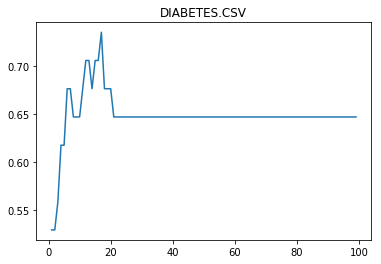

In [16]:
import matplotlib.pyplot as plt
plotagem = []
k = list(range(1,100))
for i in k:
    plotagem.append(aplicacaoMassiva(i, 'diabetes.csv'))

print(plotagem)

plt.plot(k, plotagem)
plt.title("DIABETES.CSV")
plt.show()

[0.5882352941176471, 0.5882352941176471, 0.6176470588235294, 0.6176470588235294, 0.6176470588235294, 0.6764705882352942, 0.6764705882352942, 0.6176470588235294, 0.5588235294117647, 0.6176470588235294, 0.5588235294117647, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5588235294117647, 0.5588235294117647, 0.5294117647058824, 0.5, 0.5, 0.5294117647058824, 0.5294117647058824, 0.5294117647058824, 0.5, 0.4411764705882353, 0.4117647058823529, 0.35294117647058826, 0.35294117647058826, 0.35294117647058826, 0.4117647058823529, 0.4117647058823529, 0.4411764705882353, 0.4117647058823529, 0.4411764705882353, 0.4411764705882353, 0.4411764705882353, 0.4411764705882353, 0.4411764705882353, 0.4117647058823529, 0.47058823529411764, 0.4411764705882353, 0.4411764705882353, 0.4117647058823529, 0.38235294117647056, 0.4117647058823529, 0.38235294117647056, 0.38235294117647056, 0.35294117647058826, 0.35294117647058826, 0.35294117647058826, 0.35294117647058826, 0.38235294117647056, 0.3529411764

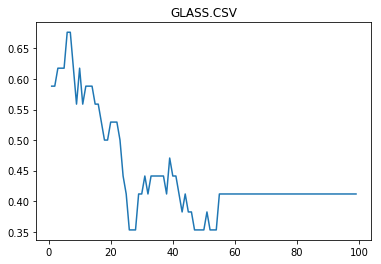

In [17]:
plotagem = []
k = list(range(1, 100))
for i in k:
    plotagem.append(aplicacaoMassiva(i, 'glass.csv'))

print(plotagem)

plt.plot(k, plotagem)
plt.title("GLASS.CSV")
plt.show()

[0.9705882352941176, 0.9117647058823529, 0.9117647058823529, 0.8823529411764706, 0.9117647058823529, 0.9117647058823529, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.8823529411764706, 0.9117647058823529, 0.9117647058823529, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.8529411764705882, 0.8823529411764706, 0.8529411764705882, 0.8529411764705882, 0.8235294117647058, 0.8529411764705882, 0.7941176470588235, 0.7941176470588235, 0.7647058823529411, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.8235294117647058, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.8529411764705882, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7941176470588235, 0.38235294117647056, 0.38235294117647056, 0.38235294117647056, 0.35294117647058826, 0.35294117647058826, 0.35294117647058826, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.29411764705

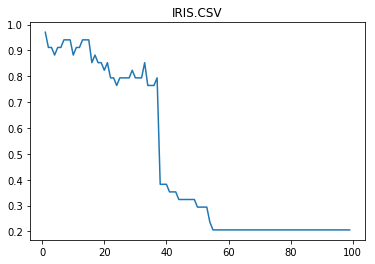

[0.9705882352941176, 0.9117647058823529, 0.9117647058823529, 0.8823529411764706, 0.9117647058823529, 0.9117647058823529, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.8823529411764706, 0.9117647058823529, 0.9117647058823529, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.8529411764705882, 0.8823529411764706, 0.8529411764705882, 0.8529411764705882, 0.8235294117647058, 0.8529411764705882, 0.7941176470588235, 0.7941176470588235, 0.7647058823529411, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.8235294117647058, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.8529411764705882, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7941176470588235, 0.38235294117647056, 0.38235294117647056, 0.38235294117647056, 0.35294117647058826, 0.35294117647058826, 0.35294117647058826, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.3235294117647059, 0.29411764705

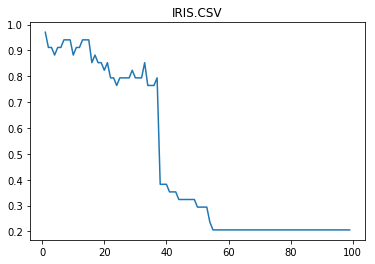

In [18]:
plotagem = []
k = list(range(1, 100))
for i in k:
    plotagem.append(aplicacaoMassiva(i, 'iris.csv'))

print(plotagem)

plt.plot(k, plotagem)
plt.title("IRIS.CSV")
plt.show()

## ITEM III

Para o arquivo iris.csv, considerando a semente S = 201704940010, K = 1, temos que o KNN é melhor que o arquivo Weka, pois sua acurácia é de 100 % do KNN local contra 96% do Weka, conforme podemos ver pelos dados abaixo:


WEKA:
```
Scheme:weka.classifiers.lazy.IBk -K 1 -W 0 -A "weka.core.neighboursearch.LinearNNSearch -A \"weka.core.EuclideanDistance -R first-last\""
Relation:     iris
Instances:    150
Attributes:   5
              sepal_length
              sepal_width
              petal_length
              petal_width
              species
Test mode:split 66.0% train, remainder test
 
=== Classifier model (full training set) ===
 
IB1 instance-based classifier
using 1 nearest neighbour(s) for classification
 
 
Time taken to build model: 0 seconds
 
=== Evaluation on test split ===
=== Summary ===
 
Correctly Classified Instances          49               96.0784 %
Incorrectly Classified Instances         2                3.9216 %
Kappa statistic                          0.9408
Mean absolute error                      0.0382
Root mean squared error                  0.1599
Relative absolute error                  8.5739 %
Root relative squared error             33.8182 %
Total Number of Instances               51     
 
=== Detailed Accuracy By Class ===
 
               TP Rate   FP Rate   Precision   Recall  F-Measure   ROC Area  Class
                 1         0          1         1         1          1        setosa
                 1         0.063      0.905     1         0.95       0.969    versicolor
                 0.882     0          1         0.882     0.938      0.943    virginica
Weighted Avg.    0.961     0.023      0.965     0.961     0.961      0.969
 
=== Confusion Matrix ===
 
  a  b  c   <-- classified as
 15  0  0 |  a = setosa
  0 19  0 |  b = versicolor
  0  2 15 |  c = virginica
```

KNN Local:
```
ARQUIVO   : iris.csv
CARREGOU  : 151 linhas cada com 5 colunas
CABEÇALHO : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
TAMANHO DA AMOSTRA: 100
TREINO: 66 TESTE: 34
ACERTOS:  34
ACURACIA: 1.0
MEAN ABSOLUTE ERROR:  0.0
ROOT MEAN SQUARED ERROR:  0.0
PRECISION:  1.0
RECALL:  0.5
F-MEASURE:  0.6666666666666666
MATRIZ DE CONFUSÃO:
[[13  0  0]
 [ 0 11  0]
 [ 0  0 10]]
```